Importing libraries and modules

In [216]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential, load_model 
from keras.layers import Dense 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 

Importing dataset

In [217]:
df = pd.read_csv('H2.csv')

pd.set_option('display.max_columns', None)
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,7/1/2015
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,4/30/2015
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,6/23/2015
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,4/2/2015


Inspecting the dataset

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   

In [219]:
df.describe()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,0.417270,109.735724,2016.174285,27.177449,15.786625,0.795185,2.182957,1.850977,0.091370,0.004941,0.025615,0.079743,0.132371,0.187369,3.226774,105.304465,0.024367,0.546918
std,0.493111,110.948526,0.699181,13.398523,8.728451,0.885026,1.456416,0.509292,0.372177,0.084323,0.157983,0.415472,1.693411,0.608620,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,0.000000,74.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,1.000000,163.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,4.000000,3.000000,10.000000,1.000000,21.000000,72.000000,21.000000,391.000000,5400.000000,3.000000,5.000000


In [220]:
df.head()

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,7/3/2015
1,1,88,2015,July,27,1,0,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,7/1/2015
2,1,65,2015,July,27,1,0,4,1,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,4/30/2015
3,1,92,2015,July,27,1,2,4,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,6/23/2015
4,1,100,2015,July,27,2,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,4/2/2015


Preprocess input data

Dropping columns that does not have significance in predicting hotel booking cancellation

In [221]:
df.drop('LeadTime', axis=1, inplace=True)
df.drop('ArrivalDateYear', axis=1, inplace=True)
df.drop('ArrivalDateWeekNumber', axis=1, inplace=True)
df.drop('ArrivalDateDayOfMonth', axis=1, inplace=True)
df.drop('AssignedRoomType', axis=1, inplace=True)
df.drop('ReservationStatus', axis=1, inplace=True)
df.drop('ReservationStatusDate', axis=1, inplace=True)

Replacing na values in columns with 0, Replacing '       NULL' value in columns to 0

In [196]:
df['Children'] = df['Children'].fillna(0)
df['Agent'] = df.Agent.apply(lambda a: 0 if a == '       NULL' else a)
df['Company'] = df.Company.apply(lambda c: 0 if c == '       NULL' else c)

Inspecting number of categories in text column

In [197]:
print('ArrivalDateMonth:')
print(df['ArrivalDateMonth'].unique())

print('\nMeal:')
print(df['Meal'].unique())

print('\nCountry:')
print(df['Country'].unique())

print('\nMarketSegment:')
print(df['MarketSegment'].unique())

print('\nDistributionChannel:')
print(df['DistributionChannel'].unique())

print('\nReservedRoomType:')
print(df['ReservedRoomType'].unique())

print('\nDepositType:')
print(df['DepositType'].unique())

print('\nCustomerType:')
print(df['CustomerType'].unique())

ArrivalDateMonth:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal:
['HB       ' 'BB       ' 'SC       ' 'FB       ']

Country:
['PRT' 'ITA' 'ESP' 'DEU' 'FRA' 'NLD' 'GBR' 'ROU' 'BRA' 'SWE' 'AUT' 'AGO'
 'BEL' 'CHE' 'NOR' 'RUS' 'ISR' 'IRL' 'POL' 'CHN' 'USA' 'MAR' 'AUS' 'MOZ'
 'TUN' 'DNK' 'MEX' 'GRC' 'DZA' 'COL' 'LUX' 'CN' 'LVA' 'FIN' 'HRV' 'STP'
 'BGR' 'UKR' 'VEN' 'TWN' 'IRN' 'KOR' 'TUR' 'BLR' 'JPN' 'CZE' 'HUN' 'AZE'
 'KAZ' 'IND' 'NZL' 'IDN' 'LTU' 'LBN' 'SRB' 'SVN' 'SVK' 'MYS' 'CMR' 'CHL'
 'ARG' nan 'SGP' 'SEN' 'PER' 'EGY' 'SAU' 'KNA' 'JOR' 'ZAF' 'THA' 'KWT'
 'LKA' 'ALB' 'ETH' 'PHL' 'ARE' 'ECU' 'OMN' 'IRQ' 'AND' 'CPV' 'MUS' 'HND'
 'NGA' 'RWA' 'EST' 'PAK' 'GEO' 'GIB' 'ZMB' 'QAT' 'KHM' 'HKG' 'MCO' 'BGD'
 'ISL' 'UZB' 'URY' 'IMN' 'TJK' 'ARM' 'MDV' 'NIC' 'GGY' 'BEN' 'MAC' 'CYP'
 'VGB' 'MLT' 'CRI' 'TZA' 'JEY' 'GAB' 'MKD' 'BIH' 'VNM' 'GHA' 'TMP' 'GLP'
 'KEN' 'PRI' 'DOM' 'LIE' 'GNB' 'BHR' 'MNE' 'UMI' 'MYT' 'FRO' 'CIV' 'ZWE'
 '

Stripping text columns of extra spaces

In [198]:
df['ArrivalDateMonth'] = df['ArrivalDateMonth'].str.strip()
df['Meal'] = df['Meal'].str.strip()
df['Country'] = df['Country'].str.strip()
df['MarketSegment'] = df['MarketSegment'].str.strip()
df['DistributionChannel'] = df['DistributionChannel'].str.strip()
df['ReservedRoomType'] = df['ReservedRoomType'].str.strip()
df['DepositType'] = df['DepositType'].str.strip()
df['CustomerType'] = df['DepositType'].str.strip()

print('ArrivalDateMonth:')
print(df['ArrivalDateMonth'].unique())

print('\nMeal:')
print(df['Meal'].unique())

print('\nCountry:')
print(df['Country'].unique())

print('\nMarketSegment:')
print(df['MarketSegment'].unique())

print('\nDistributionChannel:')
print(df['DistributionChannel'].unique())

print('\nReservedRoomType:')
print(df['ReservedRoomType'].unique())

print('\nDepositType:')
print(df['DepositType'].unique())

print('\nCustomerType:')
print(df['CustomerType'].unique())

ArrivalDateMonth:
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

Meal:
['HB' 'BB' 'SC' 'FB']

Country:
['PRT' 'ITA' 'ESP' 'DEU' 'FRA' 'NLD' 'GBR' 'ROU' 'BRA' 'SWE' 'AUT' 'AGO'
 'BEL' 'CHE' 'NOR' 'RUS' 'ISR' 'IRL' 'POL' 'CHN' 'USA' 'MAR' 'AUS' 'MOZ'
 'TUN' 'DNK' 'MEX' 'GRC' 'DZA' 'COL' 'LUX' 'CN' 'LVA' 'FIN' 'HRV' 'STP'
 'BGR' 'UKR' 'VEN' 'TWN' 'IRN' 'KOR' 'TUR' 'BLR' 'JPN' 'CZE' 'HUN' 'AZE'
 'KAZ' 'IND' 'NZL' 'IDN' 'LTU' 'LBN' 'SRB' 'SVN' 'SVK' 'MYS' 'CMR' 'CHL'
 'ARG' nan 'SGP' 'SEN' 'PER' 'EGY' 'SAU' 'KNA' 'JOR' 'ZAF' 'THA' 'KWT'
 'LKA' 'ALB' 'ETH' 'PHL' 'ARE' 'ECU' 'OMN' 'IRQ' 'AND' 'CPV' 'MUS' 'HND'
 'NGA' 'RWA' 'EST' 'PAK' 'GEO' 'GIB' 'ZMB' 'QAT' 'KHM' 'HKG' 'MCO' 'BGD'
 'ISL' 'UZB' 'URY' 'IMN' 'TJK' 'ARM' 'MDV' 'NIC' 'GGY' 'BEN' 'MAC' 'CYP'
 'VGB' 'MLT' 'CRI' 'TZA' 'JEY' 'GAB' 'MKD' 'BIH' 'VNM' 'GHA' 'TMP' 'GLP'
 'KEN' 'PRI' 'DOM' 'LIE' 'GNB' 'BHR' 'MNE' 'UMI' 'MYT' 'FRO' 'CIV' 'ZWE'
 'MMR' 'PAN' 'BFA' 'LBY' 'MLI'

Encoding strings in columns as integer

In [199]:
df['ArrivalDateMonth'] = pd.factorize(df['ArrivalDateMonth'])[0]
df['Meal'] = pd.factorize(df['Meal'])[0]
df['Country'] = pd.factorize(df['Country'])[0]
df['MarketSegment'] = pd.factorize(df['MarketSegment'])[0]
df['DistributionChannel'] = pd.factorize(df['DistributionChannel'])[0]
df['ReservedRoomType'] = pd.factorize(df['ReservedRoomType'])[0]
df['DepositType'] = pd.factorize(df['DepositType'])[0]
df['CustomerType'] = pd.factorize(df['CustomerType'])[0]

In [200]:
pd.set_option('display.max_columns', None)
df.head()

,IsCanceled,LeadTime,ArrivalDateMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
0,0,6,0,0,2,1,0.0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0.0,0,0
1,1,88,0,0,4,2,0.0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,0,76.5,0,1
2,1,65,0,0,4,1,0.0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,0,68.0,0,1
3,1,92,0,2,4,2,0.0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,0,76.5,0,2
4,1,100,0,0,2,2,0.0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,0,76.5,0,1


Splitting the dataset into input features (X) and output (y)

In [201]:
X = df.drop('IsCanceled', axis=1)
y = df['IsCanceled']

Normalizing the input features

In [202]:
scaler = StandardScaler() 
X = scaler.fit_transform(X) 

Splitting dataset into training and testing sets

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [204]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(63464, 24)
(63464,)
(15866, 24)
(15866,)


Defining model architecture

In [205]:
model = Sequential() 
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Compiling model

In [206]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Defining Model Checkpoint

In [207]:
checkpoint_filepath = 'model.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath, 
    save_weights_only=False, 
    monitor='val_accuracy', 
    mode='max', 
    save_best_only=True)

Fitting model on training data

In [208]:
history = model.fit(X_train, y_train, 
                    epochs=5, 
                    batch_size=32, 
                    validation_data=(X_test, y_test),
                    callbacks=[model_checkpoint_callback])

Epoch 1/5
1984/1984 [==============================] - 5s 2ms/step - loss: 0.4169 - accuracy: 0.8038 - val_loss: 0.3894 - val_accuracy: 0.8121
Epoch 2/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8221 - val_loss: 0.3688 - val_accuracy: 0.8291
Epoch 3/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3650 - accuracy: 0.8284 - val_loss: 0.3674 - val_accuracy: 0.8301
Epoch 4/5
1984/1984 [==============================] - 5s 2ms/step - loss: 0.3566 - accuracy: 0.8331 - val_loss: 0.3610 - val_accuracy: 0.8305
Epoch 5/5
1984/1984 [==============================] - 4s 2ms/step - loss: 0.3517 - accuracy: 0.8343 - val_loss: 0.3564 - val_accuracy: 0.8312


Loading model saved in earlier step

In [209]:
model = load_model(checkpoint_filepath)

Evaluating model on test data

In [210]:
score = model.evaluate(X_test, y_test)

496/496 [==============================] - 1s 1ms/step - loss: 0.3564 - accuracy: 0.8312


In [211]:
score

[0.3563881814479828, 0.8312113881111145]

Visualizing Accuracy and Loss

In [212]:
import matplotlib.pyplot as plt

Plotting the training and validation accuracy over epochs

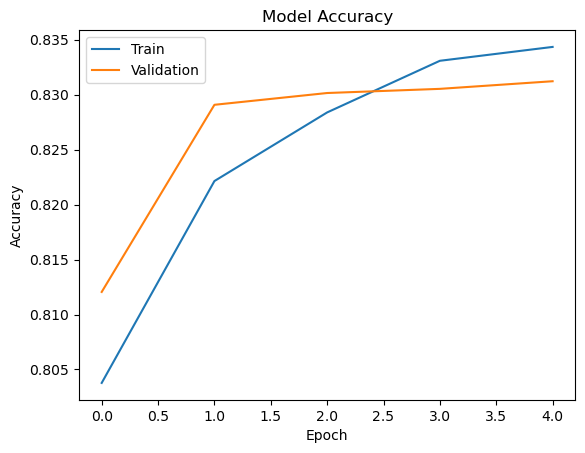

In [213]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Plotting the training and validation loss over epochs

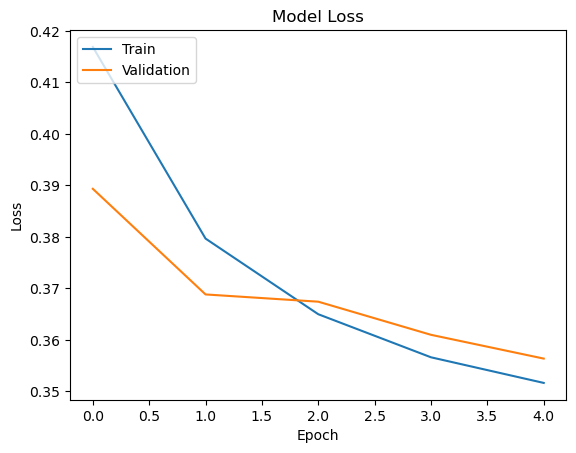

In [214]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()